# Deep Learning


### Case Study - ANN

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras as ks

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

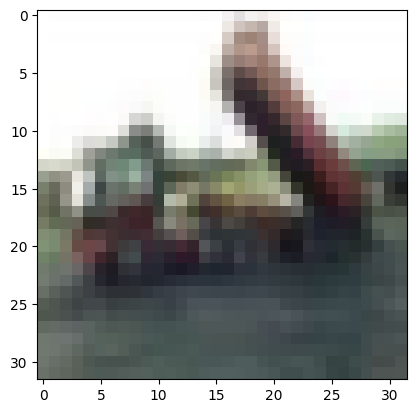

In [10]:
plt.imshow(x_train[2, : , :, :])

In [11]:
# Scaling - to make the numerical value ranges from 0 to 1, instead of 0 to 255.
# To make the Models understand better / stabilize the Learning process
x_train = x_train / 255
x_test = x_test / 255

# Apply One Hot Encoding on y_train
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Flatten the input
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

In [12]:
# Model Building
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(3072,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,358 (1.58 MB)

 Trainable params: 413,358 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Here the Params 393,344 is 32 * 32 * 3 * 128 ( nuerons)

In [13]:
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2627 - loss: 1.9988 - val_accuracy: 0.3555 - val_loss: 1.7884
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3659 - loss: 1.7608 - val_accuracy: 0.3773 - val_loss: 1.7089
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3894 - loss: 1.6846 - val_accuracy: 0.3900 - val_loss: 1.6889
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4147 - loss: 1.6269 - val_accuracy: 0.4252 - val_loss: 1.5900
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4278 - loss: 1.5942 - val_accuracy: 0.4381 - val_loss: 1.5738
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4395 - loss: 1.5636 - val_accuracy: 0.4512 - val_loss: 1.5297
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4446 - loss: 1.5427 - val_accuracy: 0.4566 - val_loss: 1.5379
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4504 - loss: 1.5225 - 

### Tensorflow Callbacks
TensorFlow callbacks are powerful tools that allow you to customize and control the training process of a model. They provide hooks into the training, evaluation, and inference lifecycle, enabling actions like logging, learning rate scheduling, saving models, and more.

Here are the common TensorFlow callbacks and their uses:

---

### 1. **ModelCheckpoint**
   - **Purpose:** Save the model during training.
   - **Key Features:**
     - Save the best model based on a monitored metric.
     - Save weights only or the entire model.
     - Define frequency of saving (e.g., every epoch or batch).
   - **Example:**
     ```python
     tf.keras.callbacks.ModelCheckpoint(
         filepath='model_best.keras',
         monitor='val_loss',
         save_best_only=True,
         save_weights_only=False
     )
     ```

---

### 2. **EarlyStopping**
   - **Purpose:** Stop training early when the monitored metric stops improving.
   - **Key Features:**
     - Avoids overfitting.
     - Monitors a specific metric like `val_loss`.
     - Adds a patience parameter to wait for a certain number of epochs before stopping.
   - **Example:**
     ```python
     tf.keras.callbacks.EarlyStopping(
         monitor='val_loss',
         patience=5,
         restore_best_weights=True
     )
     ```

---

### 3. **LearningRateScheduler**
   - **Purpose:** Dynamically adjust the learning rate during training.
   - **Key Features:**
     - Define a custom schedule as a function of the epoch.
   - **Example:**
     ```python
     def lr_schedule(epoch):
         initial_lr = 0.01
         if epoch > 10:
             return initial_lr * 0.1
         return initial_lr

     tf.keras.callbacks.LearningRateScheduler(lr_schedule)
     ```

---

### 4. **ReduceLROnPlateau**
   - **Purpose:** Reduce the learning rate when a monitored metric has stopped improving.
   - **Key Features:**
     - Automatically adjusts the learning rate during plateaus.
   - **Example:**
     ```python
     tf.keras.callbacks.ReduceLROnPlateau(
         monitor='val_loss',
         factor=0.1,
         patience=3,
         min_lr=1e-6
     )
     ```

---

### 5. **TensorBoard**
   - **Purpose:** Visualize training metrics, model graphs, and other statistics in TensorBoard.
   - **Key Features:**
     - Logs metrics during training.
     - Allows real-time monitoring of training progress.
   - **Example:**
     ```python
     tf.keras.callbacks.TensorBoard(
         log_dir='logs',
         histogram_freq=1
     )
     ```

---

### 6. **CSVLogger**
   - **Purpose:** Logs training metrics into a CSV file.
   - **Key Features:**
     - Records epoch-level metrics.
   - **Example:**
     ```python
     tf.keras.callbacks.CSVLogger(
         filename='training_log.csv',
         append=True
     )
     ```

---

### 7. **TerminateOnNaN**
   - **Purpose:** Stops training when NaN values are encountered in loss or metrics.
   - **Example:**
     ```python
     tf.keras.callbacks.TerminateOnNaN()
     ```

---

### 8. **ProgbarLogger**
   - **Purpose:** Displays a progress bar during training.
   - **Key Features:**
     - Useful for monitoring training in a terminal or notebook.
   - **Example:**
     ```python
     tf.keras.callbacks.ProgbarLogger(count_mode='steps')
     ```

---

### 9. **BackupAndRestore**
   - **Purpose:** Save training state to resume from interruptions (e.g., crashes).
   - **Key Features:**
     - Periodically saves training checkpoints.
   - **Example:**
     ```python
     tf.keras.callbacks.BackupAndRestore(
         backup_dir='backup'
     )
     ```

---

### 10. **Custom Callback**
   - **Purpose:** Create your own callback to define custom behavior during training.
   - **How to create:**
     - Subclass `tf.keras.callbacks.Callback`.
     - Override methods like `on_epoch_begin`, `on_epoch_end`, `on_batch_begin`, etc.
   - **Example:**
     ```python
     class CustomCallback(tf.keras.callbacks.Callback):
         def on_epoch_end(self, epoch, logs=None):
             print(f"Epoch {epoch} ended with loss: {logs['loss']}")

     custom_callback = CustomCallback()
     ```

---

### 11. **LambdaCallback**
   - **Purpose:** Quickly define lightweight custom behaviors without creating a new class.
   - **Example:**
     ```python
     tf.keras.callbacks.LambdaCallback(
         on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch} ended.")
     )
     ```

---

### Usage Example
Callbacks are passed to the `fit` method of the model:
```python
model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        tf.keras.callbacks.ModelCheckpoint('model_best.keras', save_best_only=True),
        tf.keras.callbacks.TensorBoard(log_dir='logs')
    ]
)
```

Callbacks simplify complex training workflows, enabling you to monitor and adapt the training process efficiently.

In [17]:
## Call backs
callback1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback2 = keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[callback1, callback2]
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4894 - loss: 1.4189 - val_accuracy: 0.4727 - val_loss: 1.4935
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4928 - loss: 1.4069 - val_accuracy: 0.4771 - val_loss: 1.4828
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4983 - loss: 1.4080 - val_accuracy: 0.4572 - val_loss: 1.5286
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4992 - loss: 1.3985 - val_accuracy: 0.4663 - val_loss: 1.5182
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5030 - loss: 1.3905 - val_accuracy: 0.4748 - val_loss: 1.4929


In [21]:
# Add More Layers to Fine Tune
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(3072,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 662,014 (2.53 MB)

 Trainable params: 662,014 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[callback1, callback2]
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2419 - loss: 2.0337 - val_accuracy: 0.3457 - val_loss: 1.7871
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3523 - loss: 1.7775 - val_accuracy: 0.3918 - val_loss: 1.6817
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3850 - loss: 1.6936 - val_accuracy: 0.3965 - val_loss: 1.6773


Fine Tuning

In [23]:
tf.keras.backend.clear_session()

model=Sequential()
model.add(Dense(200,activation='relu',input_shape=(3072,)))

model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 663,614 (2.53 MB)

 Trainable params: 662,814 (2.53 MB)

 Non-trainable params: 800 (3.12 KB)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [25]:
model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),callbacks=[callback1,callback2])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2532 - loss: 2.0674 - val_accuracy: 0.3632 - val_loss: 1.7701
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.3501 - loss: 1.7994 - val_accuracy: 0.3763 - val_loss: 1.7226
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3740 - loss: 1.7477 - val_accuracy: 0.4076 - val_loss: 1.6534


## **Dense Layer**
A **Dense layer** (also known as a fully connected layer) is a fundamental building block in deep learning architectures, especially in neural networks. It connects each input node to every output node in the layer, making it a powerful and versatile layer for learning complex representations.

---

### Key Features of a Dense Layer:
1. **Fully Connected Nodes**:
   - Each neuron in the Dense layer is connected to every neuron in the previous layer.
   - It computes a weighted sum of the inputs and passes it through an activation function.

2. **Learnable Parameters**:
   - **Weights (W):** The connection weights between input and output nodes.
   - **Bias (b):** A learnable scalar added to the weighted sum to introduce flexibility.

3. **Mathematical Representation**:
   The output of a Dense layer can be expressed as:
   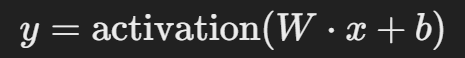
   - \( W \): Weight matrix.
   - \( x \): Input vector.
   - \( b \): Bias vector.
   - \( \text{activation} \): Activation function (e.g., ReLU, sigmoid, softmax).

---

### Dense Layer in TensorFlow/Keras:
You can add a Dense layer to a model using `tf.keras.layers.Dense`.

#### Basic Syntax:
```python
from tensorflow.keras.layers import Dense

dense_layer = Dense(units=128, activation='relu')
```

- **`units`:** Number of neurons in the layer.
- **`activation`:** Activation function applied to the output (e.g., `relu`, `sigmoid`, `softmax`, `tanh`, or `linear`).

---

### Examples of Dense Layer Usage:

#### Example 1: Simple Dense Layer in Sequential Model
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # For multi-class classification
])
```

#### Example 2: Adding a Dense Layer in Functional API
```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(100,))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)
```

---

### Activation Functions in Dense Layers:
- **ReLU (Rectified Linear Unit):** Often used in hidden layers.
- **Sigmoid:** Used for binary classification problems.
- **Softmax:** Used for multi-class classification.
- **Tanh:** Used for outputs in the range \([-1, 1]\).
- **Linear (no activation):** Common in regression tasks.

---

### Applications of Dense Layers:
1. **Classification Tasks**:
   - Output layer uses softmax or sigmoid activation.
2. **Regression Tasks**:
   - Output layer often has linear activation.
3. **Feature Transformation**:
   - Intermediate Dense layers can transform input features into representations suited for the task.

---

### Advantages of Dense Layers:
- **Versatility:** Can model any type of input-output relationship.
- **Interconnectedness:** Captures complex patterns through fully connected neurons.
- **Flexibility:** Works with different activation functions and configurations.

---

### Limitations:
1. **Overfitting:** Due to a large number of parameters, Dense layers can overfit small datasets.
   - Mitigation: Use regularization (L1/L2) or dropout.
2. **High Computational Cost:** Fully connected layers can become computationally expensive with high-dimensional input.

---

Dense layers are an integral part of neural networks and are often combined with other layer types (e.g., convolutional layers, recurrent layers) for better performance on specialized tasks.